# **1. DATA SET AND VISUALIZATION FUNCTION**

Copied most of this section from the slides.

In [33]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import randint
import numpy as np

X, y = make_moons (n_samples = 500, noise = 0.15, random_state = 49)
y = y*2-1.0 # convert the labels from {0,1} to {-1, +1}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

import matplotlib.pyplot as plt

def plot_svm (clf, X, y, axes=[-2, 3, -2, 2]):
    """
    Generate a simple plot of SVM including the decision boundary, margin, and its training data
    
    Parameters
    ----------
    clf: your classifier handle
    X: feature matrix shape(m_samples, n_features)
    y: label vector shape(m_samples, )
    axes: (optional) the axes of the plot in format [xmin, xmax, ymin, ymax] 
    """
   
    # Create a mesh grid based on the provided axes (100 x 100 resolution)
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s,x1s) # create a mesh grid
    X_mesh = np.c_[x0.ravel(), x1.ravel()] # convert all mesh points into 2-D points
    y_pred = clf.predict(X_mesh).reshape(x0.shape) # predict then covert back to the 2-D
    y_decision = clf.decision_function(X_mesh).reshape(x0.shape)

    plt.figsize=(16, 9)
    plt.plot(X[:, 0][y==-1], X[:, 1][y==-1], "bo", label="Class -1")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "go", label="Class +1")
    # Plot out the support vectors (in red)
    plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=80, c="r", label="Support Vectors")
    # Plot decision boundary and margins
    plt.contourf(x0,x1, y_pred, cmap = plt.cm.brg, alpha = 0.1)
    plt.contourf(x0,x1, y_decision, cmap = plt.cm.brg, alpha = 0.2)
    plt.contour(x0, x1, y_decision, colors='k',
                 levels=[-1, 0, 1], alpha=0.5,
                 linestyles=['--', '-', '--'])
    plt.legend(loc="lower right")
    plt.axis("auto")

    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0) 

# **2. TRAIN SVM FOR CLASSIFICATION TASK**

### Linear Kernel

              precision    recall  f1-score   support

        -1.0       0.88      0.78      0.82        45
         1.0       0.83      0.91      0.87        55

    accuracy                           0.85       100
   macro avg       0.85      0.84      0.85       100
weighted avg       0.85      0.85      0.85       100

Confusion Matrix: 
[[35 10]
 [ 5 50]]


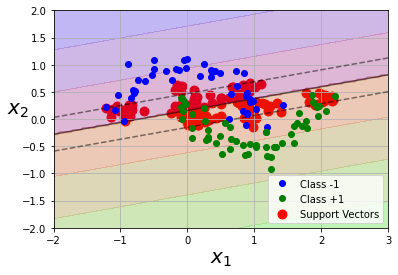

In [3]:
# Linear before tuning
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)
predictions = svm_clf.predict(X_test)
# Output precision, recall, f1, and support scores
print(classification_report(y_test, predictions))
# Confusion Matrix
print("Confusion Matrix: ")
print(confusion_matrix(y_test, predictions))
# Plot graph
plot_svm(svm_clf, X_test, y_test)

**RandomizedSearchCV**

Best Params: {'C': 10.50714306409916}
              precision    recall  f1-score   support

        -1.0       0.87      0.76      0.81        45
         1.0       0.82      0.91      0.86        55

    accuracy                           0.84       100
   macro avg       0.85      0.83      0.84       100
weighted avg       0.84      0.84      0.84       100

Confusion Matrix: 
[[34 11]
 [ 5 50]]


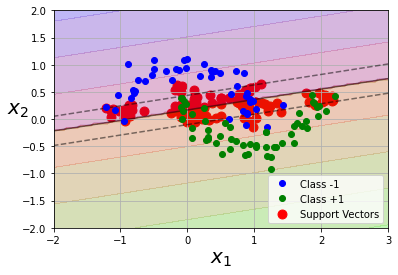

In [65]:
from scipy.stats import reciprocal, uniform

linear_param_distribs = {
    'C': uniform(1,10)
}

svm_clf = SVC(kernel="linear")
rnd_search = RandomizedSearchCV(svm_clf, param_distributions=linear_param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_train, y_train)
final_model = rnd_search.best_estimator_
predictions = final_model.predict(X_test)
# Show best hyperparameters
print("Best Params: " + str(rnd_search.best_params_))
# Output precision, recall, f1, and support scores
print(classification_report(y_test, predictions))
# Confusion Matrix
print("Confusion Matrix: ")
print(confusion_matrix(y_test, predictions))
# Plot graph
plot_svm(final_model, X_test, y_test)

**GridSearchCV**

<class 'sklearn.svm._classes.SVC'>
Best Params: {'C': 7.5}
              precision    recall  f1-score   support

        -1.0       0.87      0.76      0.81        45
         1.0       0.82      0.91      0.86        55

    accuracy                           0.84       100
   macro avg       0.85      0.83      0.84       100
weighted avg       0.84      0.84      0.84       100

Confusion Matrix: 
[[34 11]
 [ 5 50]]


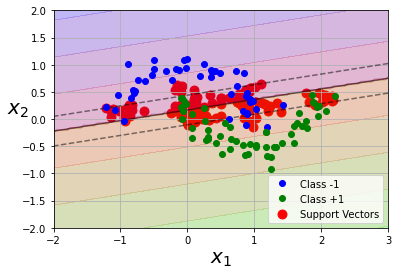

In [75]:
param_grid = [
      {'C': [0.1, 1.0, 5.0, 7.5, 10.0, 10.507, 15.0, 100.0]},       
]



svm_clf = SVC(kernel="linear")
grid_search = GridSearchCV(svm_clf, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

grid_search.fit(X_train, y_train)
final_model = grid_search.best_estimator_
predictions = final_model.predict(X_test)
# Show best hyperparameters
print("Best Params: " + str(grid_search.best_params_))
# Output precision, recall, f1, and support scores
print(classification_report(y_test, predictions))
# Confusion Matrix
print("Confusion Matrix: ")
print(confusion_matrix(y_test, predictions))
# Plot graph
plot_svm(final_model, X_test, y_test)

For the Linear kernel, there is no increase in precision, recall or the f-1 score by tuning the model. That being said, the best hyperparameters found are:

**Grid Search:** C = 7.5

**Randomized Search:** C = 10.507

Interestingly, when 10.507 is included as a value in Grid Search, it still finds 7.5 as the optimal hyperparameter. 

### Polynomial Kernel

              precision    recall  f1-score   support

        -1.0       0.97      0.78      0.86        45
         1.0       0.84      0.98      0.91        55

    accuracy                           0.89       100
   macro avg       0.91      0.88      0.89       100
weighted avg       0.90      0.89      0.89       100

Confusion Matrix: 
[[35 10]
 [ 1 54]]


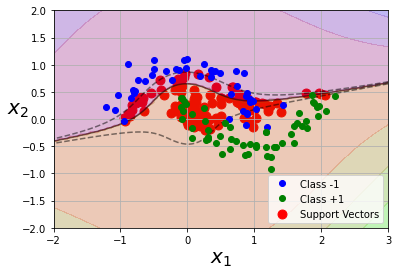

In [4]:
# Polynomial
svm_clf = SVC(kernel='poly')
svm_clf.fit(X_train, y_train)
predictions = svm_clf.predict(X_test)
# Output precision, recall, f1, and support scores
print(classification_report(y_test, predictions))
# Confusion Matrix
print("Confusion Matrix: ")
print(confusion_matrix(y_test, predictions))
# Plot graph
plot_svm(svm_clf, X_test, y_test)

**RandomizedSearchCV**

Best Params: {'C': 5.319450186421157, 'degree': 1.7473748411882515, 'gamma': 0.016738085788752122}
              precision    recall  f1-score   support

        -1.0       0.83      0.76      0.79        45
         1.0       0.81      0.87      0.84        55

    accuracy                           0.82       100
   macro avg       0.82      0.81      0.82       100
weighted avg       0.82      0.82      0.82       100

Confusion Matrix: 
[[34 11]
 [ 7 48]]


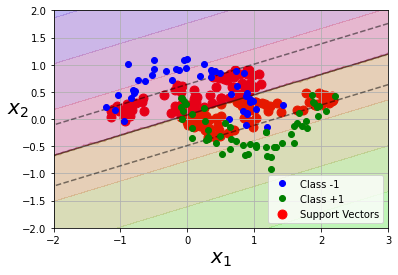

In [57]:
poly_param_distribs = {
    'gamma': reciprocal(0.001, 0.1),
    'C': uniform(1,10),
    'degree': uniform(0,6)
}

svm_clf = SVC(kernel="poly")
rnd_search = RandomizedSearchCV(svm_clf, param_distributions=poly_param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_train, y_train)
final_model = rnd_search.best_estimator_
predictions = final_model.predict(X_test)
# Show best hyperparameters
print("Best Params: " + str(rnd_search.best_params_))
# Output precision, recall, f1, and support scores
print(classification_report(y_test, predictions))
# Confusion Matrix
print("Confusion Matrix: ")
print(confusion_matrix(y_test, predictions))
# Plot graph
plot_svm(final_model, X_test, y_test)

For the Polynomial kernel, there is also no increase in precision, recall or the f-1 score by tuning the model. That being said, the best hyperparameters found are:

**Randomized Search:** C = 5.319, degree = 1.747, gamma = 0.017

Grid search took too long to complete (over 15 minutes) so I only performed a randomized search on this SVM. 

### Gaussian RBF Kernel

              precision    recall  f1-score   support

        -1.0       1.00      0.93      0.97        45
         1.0       0.95      1.00      0.97        55

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100

Confusion Matrix: 
[[42  3]
 [ 0 55]]


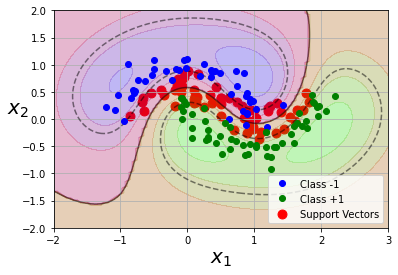

In [58]:
# Guassian RBF
svm_clf = SVC(kernel='rbf')
svm_clf.fit(X_train, y_train)
predictions = svm_clf.predict(X_test)
# Output precision, recall, f1, and support scores
print(classification_report(y_test, predictions))
# Confusion Matrix
print("Confusion Matrix: ")
print(confusion_matrix(y_test, predictions))
# Plot graph
plot_svm(svm_clf, X_test, y_test)

**RandomizedSearchCV**

Best Params: {'C': 10, 'degree': 4, 'gamma': 1}
              precision    recall  f1-score   support

        -1.0       1.00      0.93      0.97        45
         1.0       0.95      1.00      0.97        55

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100

Confusion Matrix: 
[[42  3]
 [ 0 55]]


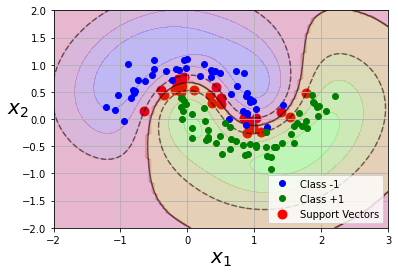

In [67]:
param_distribs = {
    'gamma': [1e-4, 1e-3, 1e-2, 0.1, 1, 10, 100],
    'C': [0.1, 1, 10, 100, 1000],
    'degree': randint(0,6)
}

svm_clf = SVC(kernel='rbf')
rnd_search = RandomizedSearchCV(svm_clf, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_train, y_train)
final_model = rnd_search.best_estimator_
predictions = final_model.predict(X_test)
# Show best hyperparameters
print("Best Params: " + str(rnd_search.best_params_))
# Output precision, recall, f1, and support scores
print(classification_report(y_test, predictions))
# Confusion Matrix
print("Confusion Matrix: ")
print(confusion_matrix(y_test, predictions))
# Plot graph
plot_svm(final_model, X_test, y_test)


**GridSearchCV**

Best Params: {'C': 10, 'degree': 0, 'gamma': 10}
              precision    recall  f1-score   support

        -1.0       1.00      0.96      0.98        45
         1.0       0.96      1.00      0.98        55

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100

Confusion Matrix: 
[[43  2]
 [ 0 55]]


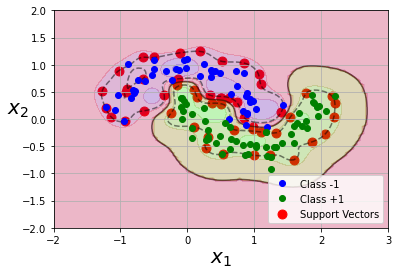

In [60]:
param_grid = [
     {'gamma': [1e-4, 1e-3, 1e-2, 0.1, 1, 10, 100],
      'C': [0.1, 1, 10, 100, 1000],
      'degree': [0,1,2,3,4,5,6]}         
]


svm_clf = SVC(kernel='rbf')
grid_search = GridSearchCV(svm_clf, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

grid_search.fit(X_train, y_train)
final_model = grid_search.best_estimator_
predictions = final_model.predict(X_test)
# Show best hyperparameters
print("Best Params: " + str(grid_search.best_params_))
# Output precision, recall, f1, and support scores
print(classification_report(y_test, predictions))
# Confusion Matrix
print("Confusion Matrix: ")
print(confusion_matrix(y_test, predictions))
# Plot graph
plot_svm(final_model, X_test, y_test)

For the RBF kernel, there is again no increase in precision, recall or the f-1 score by tuning the model. That being said, the best hyperparameters found are:

**Grid Search:** C = 10, degree = 0, gamma = 10

 **Randomized Search:** C = 10, degree = 4, gamma = 1



# **3. IMPLEMENT YOUR OWN NON-LINEAR SVM**

In [39]:
import math

# Use the information from the lecture slides to formulate the SVM Kernels. 
# To help you get started, the Linear Kernel (simply just a dot product) has been provided to you. 
# These kernel functions will be called in the SVM class
# Linear Kernel             
def linear_kernel(u, v):
    return np.dot(u, v)

# Polynomial Kernel (of degree up to and including p)
def polynomial_kernel(u, v, p=2):
    # SUBTASK 1: Implement the kernel formulation here
    dot_product = np.dot(u,v) + 1
    # formula: (u dot v + 1)^p
    result = dot_product**p
    
    return result

# Gaussian RBF Kernel
def rbf_kernel(u, v, gamma=10):
    # SUBTASK 2: Implement the kernel formulation here
    # formula: K(x, x') = exp(-gamma * ||x-x'||^2)
    
    # Calculate euclidian distance between vectors u and v
    euclidian_dist = np.linalg.norm(u-v) 
    # Square distance value
    squared = euclidian_dist**2
    # Calculate RBF kernel
    rbf_kernel = math.exp((-1*gamma) * squared)
    
    return rbf_kernel

In [40]:
import cvxopt # The optimization package for Quadratic Programming
import cvxopt.solvers
from sklearn.base import BaseEstimator, ClassifierMixin 
# extending these classes is required by all scikitlearn classes that will need fit, transform, and fit_transform functions
# this is what enables inclusion in pipelines and compatability with other scikitlearn structures and functions

class MySVM(BaseEstimator, ClassifierMixin):
    """The Implementation of the SVM class"""

    def __init__(self, kernel=linear_kernel, C=None):
        self.kernel = kernel # the kernel function used; this is a function and can be called
        self.C = C # make sure to set this when instantiating this class; is C is None, your performance will be weird
        if self.C is not None: self.C = float(self.C)
        self.K = None
        self.a = None
        

    def fit(self, X, y=None):
        """
        Train SVM based on the training set
        Parameters
        ----------
        X: feature matrix shape(m_samples, n_features)
        y: label vector shape(m_samples, )
        """
        
        m_samples, n_features = X.shape

        # To speed up repeated applications of the kernel function, dynamic programming is used
        # All pairs of points have the kernel function computed over them and the result stored in K
        # K is indexed by indices in X, so K[i,j] = kernel_function(X[i], X[j])
        # You may use K in your code later in this function, but are not required to
        # DO NOT edit this code
        K = np.zeros((m_samples, m_samples))
        for i in range(m_samples):
            for j in range(m_samples):
                K[i,j] = self.kernel(X[i], X[j])
        self.K = K

        # This part requires some understanding of Quadratic Programming (QP)
        # Below is the user's guide for the QP from CVXOPT 
        # http://cvxopt.org/userguide/coneprog.html#quadratic-programming
        # DO NOT edit any of this code until Subtask 3
        P = cvxopt.matrix(np.outer(y,y) * K)
        q = cvxopt.matrix(np.ones(m_samples) * -1)
        A = cvxopt.matrix(y, (1,m_samples))
        b = cvxopt.matrix(0.0)

        if self.C is None:
            G = cvxopt.matrix(np.diag(np.ones(m_samples) * -1))
            h = cvxopt.matrix(np.zeros(m_samples))
        else:
            tmp1 = np.diag(np.ones(m_samples) * -1)
            tmp2 = np.identity(m_samples)
            G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
            tmp1 = np.zeros(m_samples)
            tmp2 = np.ones(m_samples) * self.C
            h = cvxopt.matrix(np.hstack((tmp1, tmp2)))

        # solve QP problem
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        # Lagrange multipliers for each point in X
        a = np.ravel(solution['x'])

        # Support vectors have non zero lagrange multipliers
        # sv is a boolean array
        # sv[i] is True iff a[i] is non-zero
        sv = a > 1e-3

        # SUBTASK 3: Find the support vectors
        # note that plot_svm expects self.support_vectors_ to be a numpy array
        # you can use a Python list in your implementation, as long as you cast to a numpy array at the end of this function
        # or, you can cast to a numpy array now
        # you should add lists to store any additional metadata related to each support vector necessary later
        # for example, if you will use the Lagrange multipliers in future calculations... 
        # ...you should add an instance variable which lists the Langrage multipliers for each support vector
        self.support_vectors_ = []
        self.lagrange_multipliers_ = a
        # Save x and y for decision function
        self.y = y
        self.x = X

        # Grab values for support vectors
        for i in range(len(sv)):
          if a[i] > 1e-3:
            arr = [X[i, 0], X[i, 1]]
            self.support_vectors_.append(arr)

        # Convert back to numpy array
        self.support_vectors_ = np.array(self.support_vectors_)

        print("%d support vectors out of %d points" % (sum(sv), m_samples))

        if self.kernel == linear_kernel:
            # Init np array with zeros so it has correct dimensions 
            self.w = np.zeros(n_features)
            
            # SUBTASK 4: Compute the Weight vector w
            
            # formula: w = sum(from i to m of alpha(i) * y(i) * x(i))
            # calculate weights for each feature
            sum_weight_a = 0
            sum_weight_b = 0
            for i in range(m_samples):
              if self.lagrange_multipliers_[i] > 0:
                sum_weight_a = sum_weight_a + self.lagrange_multipliers_[i] * y[i] * X[i,0]
                sum_weight_b = sum_weight_b + self.lagrange_multipliers_[i] * y[i] * X[i,1]

            # Convert back to numpy array
            self.w = np.array([sum_weight_a,sum_weight_b])
        else:
          # No need to compute for w in non-linear case
          # Instead, we will use alpha (a) directly to predict the labels
          self.w =  None
        
        # SUBTASK 5: Compute the Intercept b
        # b can be computed based on any arbitrary support vector
        # it is recommended that you use self.support_vectors_[0], since this will always exist
        # b should NOT be in terms of w, since w only exists in the linear case
        
        # Apply formula for b = y^k - sum(alpha_i * y_i * K(x^i, x^k))
        # Use self.support_vectors[0]'s y value and iterate through samples to get the sum
        sigma = 0.0
        for i in range(m_samples):
            # check condition that a_i > 0
            if self.lagrange_multipliers_[i] > 0:
                # K(x^i, x^k)
                kernel_result = self.kernel(self.x[i],self.x[0])
                # sigma(i) = alpha_i * y_i * K(x^i, x^k)
                sigma += self.lagrange_multipliers_[i] * self.y[i] * kernel_result
        # bias = y^k - sigma(from i to m)
        self.b = y[0] - sigma
        

    def decision_function(self, X):
        """The decision function is essentially w^T . x + b"""
        if self.w is not None:
            return np.dot(X, self.w) + self.b
        else:
            # SUBTASK 6: for non-linear case, implement the kernel trick to predict label here
            # you are predicting one label for each point in X
            # note that this X may differ from the X passed to self.fit
            y_predict = []
            for test in range(len(X)):
                sigma = 0.0
                for i in range(len(self.x)):
                    if self.lagrange_multipliers_[i] > 0:
                        sigma += self.lagrange_multipliers_[i] * self.y[i] * self.kernel(self.x[i], X[test])
                y_predict.append(sigma + self.b)

            return np.array(y_predict)


    def predict(self, X):
        """Predicts -1,+1 based on the sign of the decision function"""
        return np.sign(self.decision_function(X))

# **4. COMPARE YOUR IMPLEMENTATION TO THE STANDARD LIBRARY**

### **Linear Kernel**

     pcost       dcost       gap    pres   dres
 0: -5.4177e+02 -1.5325e+04  4e+04  7e-01  3e-14
 1: -4.3091e+02 -3.9737e+03  4e+03  2e-02  2e-14
 2: -5.5976e+02 -1.3079e+03  8e+02  4e-03  2e-14
 3: -6.7445e+02 -9.7317e+02  3e+02  1e-03  3e-14
 4: -7.1814e+02 -8.8446e+02  2e+02  6e-04  3e-14
 5: -7.4474e+02 -8.3482e+02  9e+01  3e-04  3e-14
 6: -7.5684e+02 -8.1235e+02  6e+01  1e-04  3e-14
 7: -7.6559e+02 -7.9655e+02  3e+01  6e-05  3e-14
 8: -7.7101e+02 -7.8839e+02  2e+01  3e-05  3e-14
 9: -7.7520e+02 -7.8159e+02  6e+00  5e-06  3e-14
10: -7.7647e+02 -7.7988e+02  3e+00  2e-06  3e-14
11: -7.7772e+02 -7.7841e+02  7e-01  7e-15  4e-14
12: -7.7802e+02 -7.7809e+02  7e-02  4e-15  4e-14
13: -7.7805e+02 -7.7806e+02  1e-02  2e-15  4e-14
14: -7.7805e+02 -7.7805e+02  3e-04  9e-15  4e-14
Optimal solution found.
108 support vectors out of 400 points
              precision    recall  f1-score   support

        -1.0       1.00      0.60      0.75        45
         1.0       0.75      1.00      0.86   

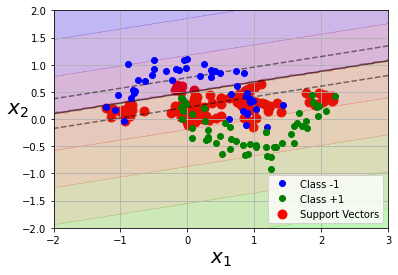

In [23]:
# Use optimal C value found in section 2
my_linear_model = MySVM(C=7.5)
my_linear_model.fit(X_train,y_train)
predictions = my_linear_model.predict(X_test)
# Output precision, recall, f1, and support scores
print(classification_report(y_test, predictions))
# Confusion Matrix
print("Confusion Matrix: ")
print(confusion_matrix(y_test, predictions))
# Plot graph
plot_svm(my_linear_model, X_test, y_test)

**Comparison:**

For the standard library SVM, averaging the best scores for the two variables x1 and x2 yields 0.86 precision, 0.85 recall and and 0.85 f-score. 

In comparison to the standard library SVM, the best scores my own SM implementation produced were mixed. As shown in the graph above, averaging the scores for the two variables x1 and x2 yields 0.88 precision, 0.80 recall and 0.81 f-score. This suggest my model is has 0.02 higher precision, but 0.05 lower recall and 0.04 lower f-1 score than the standard library SVM. 

Despite performing worse in two out of three of the performance metrics, the results were surprisingly close: my model had only 2.30% higher precision, 6.06% lower recall and 4.81% lower f-score.  

### **Polynomial Kernel**

     pcost       dcost       gap    pres   dres
 0: -4.2552e+02 -8.7098e+03  2e+04  8e-01  9e-14
 1: -3.6713e+02 -2.6732e+03  3e+03  5e-02  8e-14
 2: -4.1009e+02 -9.2832e+02  6e+02  8e-03  6e-14
 3: -4.7902e+02 -6.8711e+02  2e+02  3e-03  6e-14
 4: -5.0493e+02 -6.3104e+02  1e+02  1e-03  7e-14
 5: -5.2225e+02 -5.9427e+02  7e+01  6e-04  8e-14
 6: -5.3284e+02 -5.7124e+02  4e+01  3e-04  8e-14
 7: -5.3988e+02 -5.5727e+02  2e+01  1e-04  9e-14
 8: -5.4392e+02 -5.5057e+02  7e+00  2e-05  9e-14
 9: -5.4592e+02 -5.4761e+02  2e+00  4e-06  1e-13
10: -5.4632e+02 -5.4706e+02  7e-01  1e-06  9e-14
11: -5.4665e+02 -5.4668e+02  3e-02  4e-08  1e-13
12: -5.4666e+02 -5.4666e+02  3e-04  4e-10  1e-13
Optimal solution found.
106 support vectors out of 400 points
              precision    recall  f1-score   support

        -1.0       1.00      0.62      0.77        45
         1.0       0.76      1.00      0.87        55

    accuracy                           0.83       100
   macro avg       0.88      0.81  

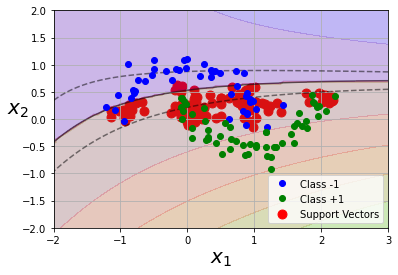

In [42]:
# Use optimal C value, p value found in section 2
my_poly_model = MySVM(kernel=polynomial_kernel, C=5.319)
my_poly_model.fit(X_train,y_train)
predictions = my_poly_model.predict(X_test)
# Output precision, recall, f1, and support scores
print(classification_report(y_test, predictions))
# Confusion Matrix
print("Confusion Matrix: ")
print(confusion_matrix(y_test, predictions))
# Plot graph
plot_svm(my_poly_model, X_test, y_test)

**Comparison:**

For the standard library SVM, averaging the best scores for the two variables x1 and x2 yields 0.91 precision, 0.88 recall and and 0.89 f-score. 

In comparison to the standard library SVM, the best scores my own SM implementation produced were mixed. As shown in the graph above, averaging the scores for the two variables x1 and x2 yields 0.88 precision, 0.81 recall and 0.82 f-score. This suggest my model is has 0.03 lower precision, 0.07 lower recall and 0.07 lower f-score than the standard library SVM. 

Even though my results for my polynomial kernel implementation were lower than that of the standard library SVM, they are still close enough that I consider the results of my implementation a success. 

### **RBF Kernel**

     pcost       dcost       gap    pres   dres
 0:  6.4341e+02 -8.4800e+03  2e+04  2e-01  3e-15
 1:  3.5601e+02 -1.0903e+03  2e+03  1e-02  3e-15
 2:  6.6501e+01 -3.8794e+02  5e+02  3e-03  2e-15
 3: -2.7969e+01 -1.7660e+02  2e+02  7e-04  2e-15
 4: -5.5446e+01 -1.2245e+02  7e+01  2e-04  2e-15
 5: -6.8328e+01 -8.5926e+01  2e+01  3e-06  2e-15
 6: -7.1794e+01 -7.6866e+01  5e+00  4e-07  2e-15
 7: -7.2891e+01 -7.4527e+01  2e+00  8e-08  1e-15
 8: -7.3276e+01 -7.3790e+01  5e-01  2e-08  2e-15
 9: -7.3395e+01 -7.3588e+01  2e-01  8e-16  2e-15
10: -7.3451e+01 -7.3501e+01  5e-02  8e-15  1e-15
11: -7.3467e+01 -7.3476e+01  9e-03  3e-16  2e-15
12: -7.3471e+01 -7.3472e+01  1e-03  9e-15  2e-15
13: -7.3471e+01 -7.3471e+01  4e-05  7e-15  2e-15
Optimal solution found.
52 support vectors out of 400 points
              precision    recall  f1-score   support

        -1.0       0.96      0.98      0.97        45
         1.0       0.98      0.96      0.97        55

    accuracy                           0.

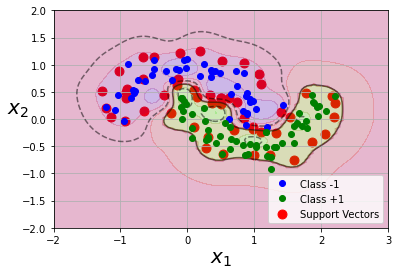

In [43]:
# Use optimal C value found in section 2
my_rbf_model = MySVM(kernel=rbf_kernel, C=10)
my_rbf_model.fit(X_train,y_train)
predictions = my_rbf_model.predict(X_test)
# Output precision, recall, f1, and support scores
print(classification_report(y_test, predictions))
# Confusion Matrix
print("Confusion Matrix: ")
print(confusion_matrix(y_test, predictions))
# Plot graph
plot_svm(my_rbf_model, X_test, y_test)

**Comparison:**

For the standard library SVM, averaging the best scores for the two variables x1 and x2 yields 0.98 precision, 0.97 recall and and 0.97 f-score. 

In comparison to the standard library SVM, the best scores my own SM implementation produced were mixed. As shown in the graph above, averaging the scores for the two variables x1 and x2 yields 0.97 precision, 0.97 recall and 0.97 f-score. This suggest my model is has 0.01 lower precision and the same recall and f-score as the standard library SVM. 

Although the scores for my other models were slightly lower for both the linear and polynomial kernel than those of the standard library, it is surprising my scores are identical for recall and f-score, and slightly lower for precsion. If the scores are accurate, then it suggests my RBF implementation performed excellently. 

### **Final Thoughts**

Overall, I am pleased with the results of my models. The linear and polynomial models scored lower than the standard library implementations in all metrics (precision, recall and f-1 score). I expected them to score lower because this is my first attempt ever implementing SVM. This is still good result because my scores were not significantly off from the standard library's implementations. For the RBF kernel, my results were very close to the standard libary RBF, which could mean that my implementation performed very well for this kernel. 